## check: 

###### do good images have empty annotation files, or no annotation files?
###### training config file: edit pipeline.config file , or download & edit as done in roboflow  (the 2 files are somewhat different)
###### load tensorboard; check model training progress
################################################## 
#### continue training
#### compare pred & GT boxes
#### get AP for each class
###################################################### 
###### labelmap creation: manually or through script?
###### how frequently are intermediate training files (model checkpoints) saved?
###### model hyperparameters: batch_size; no_of_steps (parity in parameter tuning b/w yolo v4 & other models) 

In [ ]:
# use of checkpoints to autosave: https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6


# custom object detection using efficientDet (Tensorflow)

In [ ]:
## TRAINING
# https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html 
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md  (ZOO)

## FULL PIPELINE
# https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD#scrollTo=fF8ysCfYKgTP&uniqifier=1
# https://towardsdatascience.com/how-to-train-a-tensorflow-2-object-detection-model-25d4da64b817
# https://blog.roboflow.com/getting-started-with-roboflow/
 
# https://gilberttanner.com/blog/tensorflow-object-detection-with-tensorflow-2-creating-a-custom-model
# https://missinglink.ai/guides/tensorflow/tensorflow-image-recognition-object-detection-api-two-quick-tutorials/

# https://medium.com/practical-deep-learning/a-complete-transfer-learning-toolchain-for-semantic-segmentation-3892d722b604


## SAMPLE NOTEBOOK IN TENSORFLOW
~/models/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb
https://colab.research.google.com/drive/1K--C2yBxIDxxX-e14Cmsx1NKeuQfyHea


####  KEY STEPS  ####
## install TF & TF object detection api
## create appropriate folder structure

## get images & label them
## split into train-test
## create labelmap (.pbtxt) & TFrecords 

## set up training - with config file & other parameters

## evaluation & model saving

## inference

In [ ]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/VQI/efficientDet/tensorflow')
#!ls

In [ ]:
!nvidia-smi

Thu Oct  8 06:30:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!top

=top - 08:40:59 up 7 min,  0 users,  load average: 0.07, 0.12, 0.08
Tasks:  14 total,   1 running,  12 sleeping,   0 stopped,   1 zombie
%Cpu(s):  3.3 us,  2.4 sy,  0.0 ni, 91.0 id,  3.2 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem : 13333552 total, 10617328 free,   566204 used,  2150020 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12495876 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
      1 root      20   0   39196   6472   4964 S   0.0  0.0   0:00.29 run.sh    
      8 root      20   0  680592  45360  24964 S   0.0  0.3   0:00.66 node      
     24 root      20   0  193924  60144  13620 S   0.0  0.5   0:01.28 jupyter-+ 
     95 root      20   0   35888   4920   3824 S   0.0  0.0   0:00.42 tail      
    104 root      20   0  522916 108404  31052 S   0.0  0.8   0:02.34 python3   
    152 root      20   0   18376   1496   1200 S   0.0  0.0   0:00.00 bash      
    153 root      20   0 2168792  20228  17096 S   0.0  0.2   

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
!nvidia-smi

Tue Sep 22 17:36:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#import os
#os.getcwd()

'C:\\Users\\DAR9KOR\\Desktop\\data\\sample_datasets\\defect_detection\\2_codes\\NEU_detection_efficientdet'

In [ ]:
!top

=top - 06:24:27 up 6 min,  0 users,  load average: 0.07, 0.11, 0.07
Tasks:  13 total,   1 running,  12 sleeping,   0 stopped,   0 zombie
%Cpu(s):  3.8 us,  2.4 sy,  0.0 ni, 90.6 id,  3.1 wa,  0.0 hi,  0.0 si,  0.1 st
KiB Mem : 13333552 total, 10779472 free,   530496 used,  2023584 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12531352 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
      1 root      20   0   39192   6520   5016 S   0.0  0.0   0:00.32 run.sh    
      8 root      20   0  682680  46716  24936 S   0.0  0.4   0:00.63 node      
     24 root      20   0  194184  60044  13668 S   0.0  0.5   0:01.31 jupyter-+ 
     92 root      20   0   35888   4728   3620 S   0.0  0.0   0:00.47 tail      
    102 root      20   0  522052 107620  31436 S   0.0  0.8   0:02.64 python3   
    138 root      20   0   18376   1636   1336 S   0.0  0.0   0:00.00 bash      
    139 root      20   0 2168792  20192  17096 S   0.0  0.2   

In [ ]:
# CPU mode was used for inferencing speed test only; training was done using GPU
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

# INSTALL RELEVANT LIBRARIES

In [ ]:
# tensorflow - with CUDA, CuDNN & appropriate drivers
# https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html#tf-install

In [ ]:
# tensorflow object detction
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2162, done.
remote: Counting objects: 100% (2162/2162), done.
remote: Compressing objects: 100% (1870/1870), done.
remote: Total 2162 (delta 513), reused 920 (delta 267), pack-reused 0
Receiving objects: 100% (2162/2162), 30.38 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (513/513), done.
Checking out files: 100% (2025/2025), done.


In [ ]:
# Install the Object Detection API+ Protobuf    #### required everytime?
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/drive/My Drive/VQI/efficientDet/tensorflow/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1571721 sha256=dc2b5bdb8273b6e06ed63363e554f8d9a685cd216a9717d97464465fa2b6c289
  Stored in directory: /tmp/pip-ephem-wheel-cache-11md_jyb/wheels/8e/27/ca/19fe337ff390bd7a828361114a767605af5cc7b04bcb8aa323
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=1d8ffc4c6ba76deef4f634f4e5e17f3e27309e8533660d8262622e1e2f23c90f
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=d7d936e9e5cf5bdb2a7743421e25f0ac09e5c6207df230e687262efbe990ee36
  Stored in directory: /root/.cache/pip/wheels/fe/a7/05/23e3699975fc20f8a30e00ac1e515ab8c61168e982abe4ce70
  Created wheel for oauth2client: filename=oauth2client-3.0.0-cp36-none-any.whl size=106382 sha256=

ERROR: pydrive 1.3.1 has requirement oauth2client>=4.0.0, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.24.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


In [ ]:
# testing the installation, From within TensorFlow/models/research/
!python ./models/research/object_detection/builders/model_builder_tf2_test.py


In [ ]:
'''# pycoco tools for evaluation, if it did not get installed
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
make
cp -r pycocotools <PATH_TO_TF>/TensorFlow/models/research/

# CREATE THE WORKSPACE

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow'

In [ ]:
os.mkdir("workspace")
os.mkdir("workspace/training_demo")  # training folder
os.mkdir("workspace/training_demo/annotations") # list of annotations for dataset; .csv & TF .record files
os.mkdir("workspace/training_demo/exported-models")  # store exported versions of our trained model(s)

os.mkdir("workspace/training_demo/images") # images + .xml files in our dataset
os.mkdir("workspace/training_demo/images/test")  # test images + .xml
os.mkdir("workspace/training_demo/images/train") # training img + .xml

os.mkdir("workspace/training_demo/models")  # sub-folder foreach training, with training pipeline *.config file + files generated during training and evaluation of model
os.mkdir("workspace/training_demo/pre-trained-models") # downloaded pre-trained models, which is used as a starting checkpoint for training

In [ ]:
!ls 
!ls ./workspace/training_demo

efficientdet_TF_training.ipynb	models	workspace
annotations  exported-models  images  models  pre-trained-models


# PRE-PROCESS DATA

#### train val test splits , data augmentation , annotation file format conversion

#### code to split data into train-val-test @Astrid

In [ ]:
# from @Astrid
# alternately, script here , to split & copy: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html

#### augment data - not yet implemented - training time augmentation is set inside config file

In [ ]:
# augment data in train set - all aug
# augmnt data in val - only resizes? - check
# no augment or TTA on test data

# https://github.com/Paperspace/DataAugmentationForObjectDetection
# https://github.com/anhtuan85/Data-Augmentation-for-Object-Detection


# check how to keep track of annotations for augmented data, where image size or shape changes
# brightness, hue kind of transforms won't change the annotation locations

#### copy images + .xml annotation to appropriate folders

In [ ]:
import shutil

listpath = '/content/drive/My Drive/VQI/efficientDet/voc2coco/data/dataset_ids/'
in_img = '/content/drive/My Drive/VQI/efficientDet/voc2coco/data/'
in_anno = '/content/drive/My Drive/VQI/efficientDet/voc2coco/data/Annotations/'
out = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/images/'

In [ ]:
# test
f = open(listpath+"test.txt") #"./data/dataset_ids/test.txt")
data = f.read()
test_dat = data.splitlines()

len(test_dat)

360

In [ ]:
# https://stackoverflow.com/questions/123198/how-do-i-copy-a-file-in-python

for i in test_dat:
    infile1 = in_img + 'test/' + i + '.jpg'
    infile2 = in_anno + i + '.xml'
    out_file = out + 'test/'            #+ i + '.jpg'
    shutil.copy2(infile1, out_file)
    shutil.copy2(infile2, out_file)
    

In [ ]:
# train
f = open(listpath+"train.txt") #"./data/dataset_ids/train.txt")
data = f.read()
train_dat = data.splitlines()

len(train_dat)

for i in train_dat:
    infile1 = in_img + 'train/' + i + '.jpg'
    infile2 = in_anno + i + '.xml'
    out_file = out + 'train/' 
    shutil.copy2(infile1, out_file)
    shutil.copy2(infile2, out_file)


In [ ]:
# val
f = open(listpath+"val.txt")  #open("./data/dataset_ids/val.txt")
data = f.read()
val_dat = data.splitlines()

outdir = out + 'val'
os.mkdir(outdir)
len(val_dat)

for i in val_dat:
    infile1 = in_img + 'val/' + i + '.jpg'
    infile2 = in_anno + i + '.xml'
    out_file = out + 'val/' 
    shutil.copy2(infile1, out_file)
    shutil.copy2(infile2, out_file)
    #in_file = 'C:/Users/DAR9KOR/Desktop/data/sample_datasets/defect_detection/2_codes/NEU_detection_efficientdet/voc2coco-master/data/Images/' + i + '.jpg'
    #out_file = 'C:/Users/DAR9KOR/Desktop/data/sample_datasets/defect_detection/2_codes/NEU_detection_efficientdet/voc2coco-master/val/' #+ i + '.jpg'
    #shutil.copy2(in_file, out_file)
    

#### create Tensorflow labelmap (classname -> integer mapping)

In [ ]:
# label_map.pbtxt in training_demo/annotations folder; without quotes
# currently done manually; can this be scripted?

'''

item {
    id: 1
    name: 'cat'
}

item {
    id: 2
    name: 'dog'
}

'''

#### create TF Records (convert .xml -> .record)

In [ ]:
import pandas

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow'

In [ ]:
'''# Create train data:
!python ./scripts/preprocessing/generate_tfrecord.py -x ./workspace/training_demo/images/train -l ./workspace/training_demo/annotations/label_map.pbtxt -o ./workspace/training_demo/annotations/train.record 

# Create test data:
!python ./scripts/preprocessing/generate_tfrecord.py -x ./workspace/training_demo/images/test -l ./workspace/training_demo/annotations/label_map.pbtxt -o ./workspace/training_demo/annotations/test.record 



In [ ]:
'''!ls ./workspace/training_demo/images/test/ | grep 'patches_12'

In [ ]:
'''!ls ./workspace/training_demo/images/train/ | grep 'patches_104'

In [ ]:
'''import cv2
cv2.imread("./workspace/training_demo/images/train/patches_104.jpg")

In [ ]:
'''# https://github.com/tensorflow/models/issues/3762
# explicitly added -i images_folder 

# Create train data:
!python ./scripts/preprocessing/generate_tfrecord.py \
-x ./workspace/training_demo/images/train \
-l ./workspace/training_demo/annotations/label_map.pbtxt \
-o ./workspace/training_demo/annotations/train.record \
-i ./workspace/training_demo/images/train

# Create test data:
!python ./scripts/preprocessing/generate_tfrecord.py \
-x ./workspace/training_demo/images/test \
-l ./workspace/training_demo/annotations/label_map.pbtxt \
-o ./workspace/training_demo/annotations/test.record \
-i ./workspace/training_demo/images/test



In [ ]:
'''# Create train data:
!python /content/drive/My\ Drive/VQI/efficientDet/tensorflow/scripts/preprocessing/generate_tfrecord.py \
-x /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/images/train \
-l /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/label_map.pbtxt \
-o /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/train.record \
-i /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/images/train

# Create test data:
!python /content/drive/My\ Drive/VQI/efficientDet/tensorflow/scripts/preprocessing/generate_tfrecord.py \
-x /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/images/test \
-l /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/label_map.pbtxt \
-o /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/test.record \
-i /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/images/test


In [ ]:
!ls

efficientdet_TF_training.ipynb	models	scripts  workspace


In [ ]:
# create csv files from xml annotation
!python ./scripts/preprocessing/xml_to_csv_DT.py

Successfully converted xml to csv.


In [ ]:
# create TF records from csv
# in the script, Change import tensorflow as tf to import tensorflow.compat.v1 as tf
!python ./scripts/preprocessing/generate_tfrecord_DT.py \
--csv_input=./workspace/training_demo/images/train_labels.csv \
--image_dir=./workspace/training_demo/images/train \
--output_path=./workspace/training_demo/annotations/train.record

!python ./scripts/preprocessing/generate_tfrecord_DT.py \
--csv_input=./workspace/training_demo/images/test_labels.csv \
--image_dir=./workspace/training_demo/images/test \
--output_path=./workspace/training_demo/annotations/test.record

2020-09-21 06:44:38.612420: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/My Drive/VQI/efficientDet/tensorflow/./workspace/training_demo/annotations/train.record
2020-09-21 06:52:25.152344: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/My Drive/VQI/efficientDet/tensorflow/./workspace/training_demo/annotations/test.record


In [ ]:
# do for the val set
# create csv files from xml annotation
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            name = root.find('filename').text
            if '.jpg' in name:
                name = name
            else:
                name = name+'.jpg'
            value = (name,  #root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


#def main():
#    image_path = os.path.join(os.getcwd(), 'annotations')
#    xml_df = xml_to_csv(image_path)
#    xml_df.to_csv('raccoon_labels.csv', index=None)
#    print('Successfully converted xml to csv.')

def main():
    for folder in ['val']: #'train', 'test']:
        #image_path = os.path.join(os.getcwd(), ('images/' + folder))
        image_path = os.path.join(os.getcwd(), ('workspace/training_demo/images/' + folder))
        xml_df = xml_to_csv(image_path)
        #xml_df.to_csv(('images/'+folder+'_labels.csv'), index=None)
        xml_df.to_csv(('./workspace/training_demo/images/'+folder+'_labels.csv'), index=None)
    print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.


In [ ]:
# create TF records from csv
# in the script, Change import tensorflow as tf to import tensorflow.compat.v1 as tf
!python ./scripts/preprocessing/generate_tfrecord_DT.py \
--csv_input=./workspace/training_demo/images/val_labels.csv \
--image_dir=./workspace/training_demo/images/val \
--output_path=./workspace/training_demo/annotations/val.record

2020-10-07 09:20:47.547318: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/My Drive/VQI/efficientDet/tensorflow/./workspace/training_demo/annotations/val.record


# CONFIGURE TRAINING

### download pre-trained model weights from TF model zoo

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow'

In [ ]:
os.chdir("workspace/training_demo/pre-trained-models/")
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/pre-trained-models'

In [ ]:
os.getcwd()
os.chdir("pre-trained-models")

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/pre-trained-models'

In [ ]:
##change chosen model to deploy different models available in the TF2 object detection zoo
MODELS_CONFIG = {
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d1': {
        'model_name': 'efficientdet_d1_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d1_640x640_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d1_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d2': {
        'model_name': 'efficientdet_d2_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d2_768x768_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d2_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
        'efficientdet-d3': {
        'model_name': 'efficientdet_d3_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d3_896x896_coco17_tpu-32.config',
        'pretrained_checkpoint': 'efficientdet_d3_coco17_tpu-32.tar.gz',
        'batch_size': 16
    }
}

#in this tutorial we implement the lightweight, smallest state of the art efficientdet model
#if you want to scale up tot larger efficientdet models you will likely need more compute!
chosen_model = 'efficientdet-d1'

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

In [ ]:
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

--2020-09-21 07:31:50--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.128, 2607:f8b0:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: â€˜efficientdet_d1_coco17_tpu-32.tar.gzâ€™

efficientdet_d1_coc 100%[===================>]  49.44M  58.1MB/s    in 0.9s    

2020-09-21 07:31:51 (58.1 MB/s) - â€˜efficientdet_d1_coco17_tpu-32.tar.gzâ€™ saved [51839363/51839363]



## configure training pipeline

In [ ]:
num_steps = 40000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] #if you can fit a large batch in memory, it may speed up your training

In [ ]:
#os.mkdir("../models/efficientdet_d1-round2")
#!cp ./efficientdet_d1_coco17_tpu-32/pipeline.config ../models/efficientdet_d1
os.mkdir("../models/efficientdet_d1-round3")

In [ ]:
# edit the pipeline.config file in ../models/model_name_location_folder/pipeline.config:

# num_classes (label map?)
# batch size
# fine_tune_checkpoint, ie path to checkpoint of pretrained model
# fine_tune_checkpoint_type: detection
# use_bfloat: set to False if not training on TPU
# train-test records
# no. of steps

In [ ]:
# edit config file from website
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

--2020-09-21 09:13:33--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d1_640x640_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: â€˜ssd_efficientdet_d1_640x640_coco17_tpu-8.configâ€™

ssd_efficientdet_d1 100%[===================>]   4.52K  --.-KB/s    in 0.001s  

2020-09-21 09:13:34 (4.58 MB/s) - â€˜ssd_efficientdet_d1_640x640_coco17_tpu-8.configâ€™ saved [4630/4630]



##### should we edit the file in models/efficientdet_d1/pipeline_config; or download the config file from modelzoo & edit, as done by roboflow? 
####### the first file has y_scale: 1.0, x_scale: 1.0, height_scale: 1.0,  width_scale: 1.0 & all decimals with high precision (many digits)
####### the 2nd file has lower precision (single decimal digits) & y_scale: 10.0, x_scale: 10.0, height_scale: 5.0,  width_scale: 5.0

In [ ]:
#prepare
pipeline_fname = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/pre-trained-models/' + base_pipeline_file
fine_tune_checkpoint = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/pre-trained-models/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

#test_record_fname = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/test.record'
test_record_fname = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/val.record'
train_record_fname = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/train.record'
label_map_pbtxt_fname = '/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/annotations/label_map.pbtxt'
num_classes = get_num_classes(label_map_pbtxt_fname)
num_steps = 20000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 


In [ ]:
num_classes

6

In [ ]:
os.getcwd()
os.chdir("pre-trained-models")

In [ ]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re

fine_tune_checkpoint = 'pre-trained-models/' + model_name + '/checkpoint/ckpt-0'
test_record_fname = 'annotations/val.record'  # 'annotations/test.record'
train_record_fname = 'annotations/train.record'
label_map_pbtxt_fname = 'annotations/label_map.pbtxt'
batch_size = 8
#tpu_option = false


#%cd /content/models/research/deploy
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('custom_pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    
    # turn off tpu
    s = re.sub('use_bfloat16: true',
               'use_bfloat16: {}'.format('false'), s)

        
    f.write(s)



writing custom configuration file


In [ ]:
%cat custom_pipeline_file.config

 # SSD with EfficientNet-b1 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d1).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b1 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 6
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/pre-trained-models'

## train

In [ ]:
!cp ../../../models/research/object_detection/model_main_tf2.py ../

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow'

In [ ]:
#os.chdir("../")
os.chdir("workspace/training_demo")
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo'

In [ ]:
#!cp ./pre-trained-models/pipeline_file.config ./models/efficientdet_d1-round2/pipeline.config
!cp ./pre-trained-models/custom_pipeline_file.config ./models/efficientdet_d1-round3/pipeline.config

In [ ]:
'''
# to avoid colab disconnection
press ctrl+shift+i simultaneously. This will open console and in the console paste the following code.

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}setInterval(ClickConnect,60000)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir './models/efficientdet_d1-round3/train'

# https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD#scrollTo=4Vk2146Ogil3&uniqifier=1
# https://towardsdatascience.com/detailed-tutorial-build-your-custom-real-time-object-detector-5ade1017fd2d#d582
# https://medium.com/analytics-vidhya/training-an-object-detection-model-with-tensorflow-api-using-google-colab-4f9a688d5e8b
# https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1471), started 0:00:35 ago. (Use '!kill 1471' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
#%reload_ext tensorboard
!kill 1471

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-10-08 07:36:27--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.164.152.149, 54.85.41.146, 54.84.116.182, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.164.152.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: â€˜ngrok-stable-linux-amd64.zipâ€™

ngrok-stable-linux- 100%[===================>]  13.13M  15.7MB/s    in 0.8s    

2020-10-08 07:36:28 (15.7 MB/s) - â€˜ngrok-stable-linux-amd64.zipâ€™ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
#the logs that are created while training 
LOG_DIR = "models/efficientdet_d1-round3/train" #"training/"
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
#The link to tensorboard.
#works after the training starts.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://e3848fcbd1c6.ngrok.io


######  in the below run, the pipeline.config is from local folder, where scales are all 1 (instead of 5,10) & has more decimal digits

In [ ]:
# run training

!python model_main_tf2.py \
    --pipeline_config_path=models/efficientdet_d1-round3/pipeline.config \
    --model_dir=models/efficientdet_d1-round3 \
    --logtostderr
#    --num_train_steps=40000 \
#    --sample_1_of_n_eval_examples=1 \
#    --num_eval_steps=500

2020-10-08 07:47:16.851872: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 07:47:19.097088: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-08 07:47:19.120828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-08 07:47:19.121482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-08 07:47:19.121532: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 07:47:19.123587: I tensorflow/stream_executor/pl

In [ ]:
i'''!python model_main_tf2.py \
    --pipeline_config_path=models/efficientdet_d1-round2/pipeline.config \
    --model_dir=models/efficientdet_d1-round2 \
    --logtostderr \
    --num_train_steps=40000 \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps=500

python3: can't open file 'model_main_tf2.py': [Errno 2] No such file or directory


## model evaluation

In [ ]:
# From the models directory
# https://towardsdatascience.com/custom-object-detection-using-tensorflow-from-scratch-e61da2e10087

# eval.py code is absent in TF2
'''
!python research/object_detection/eval.py \
    --logtostderr \
    --pipeline_config_path=ssd_mobilenet_v2_coco.config \
    --checkpoint_dir=train \
    --eval_dir=eval


In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow'

In [ ]:
os.chdir("workspace/training_demo/")

In [ ]:
# https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html
# this creates a new folder "eval" inside current dir
!python model_main_tf2.py \
--model_dir=models/efficientdet_d1 \
--pipeline_config_path=models/efficientdet_d1/pipeline.config \
--checkpoint_dir=models/efficientdet_d1
#--alsologtostderr   ## needed to add this option to generate log file

2020-09-23 06:32:22.854067: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W0923 06:32:26.997842 140228385134464 model_lib_v2.py:925] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0923 06:32:26.998091 140228385134464 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0923 06:32:26.998194 140228385134464 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0923 06:32:26.998276 140228385134464 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0923 06:32:26.998437 140228385134464 model_lib_v2.py:940] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2020-09-23 06:32:27.026399: I tensorflow/stream_executor/pl

In [ ]:
# restarting training

!python model_main_tf2.py \
--model_dir=models/efficientdet_d1 \
--pipeline_config_path=models/efficientdet_d1/pipeline.config \
--alsologtostderr   ## needed to add this option to generate log file

## save/ export trained model

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo'

In [ ]:
!cp ../../models/research/object_detection/exporter_main_v2.py ./

In [ ]:
# creates a new directory "efficientdet_d1" inside the pre-existing dir "exported-models"
!python exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path ./models/efficientdet_d1-round2/pipeline.config \
--trained_checkpoint_dir ./models/efficientdet_d1-round2 \
--output_directory ./exported-models/efficientdet_d1-round2

2020-09-23 06:38:06.941905: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-23 06:38:10.857399: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-23 06:38:10.891938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-23 06:38:10.892479: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-09-23 06:38:10.892529: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-23 06:38:10.894067: I tensorflow/stream_executor/platform/default

# INFERENCE

In [ ]:
import io
import os
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
os.chdir("/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/")

#### load model & labelmap : the 2 methods primarily vary in how the model is loaded for inferencing
##### method 1 uses a .pb file
##### method 2 uses checkpoint file
##### inferencing results change based on which checkpoint is used


In [ ]:
'''
# Roboflow, method 1: https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD#scrollTo=YnSEZIzl4M10&uniqifier=1

### load model
#recover our saved model
pipeline_config = "./models/efficientdet_d1/pipeline.config"  #pipeline_file

#generally you want to put the last ckpt from training in here
model_dir = '/content/training/ckpt-11'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)


# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('/content/training/ckpt-19'))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)


###########################################################################
## map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
# load model, method 2
# https://colab.research.google.com/github/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/Tensorflow_2_Object_Detection_Train_model.ipynb#scrollTo=EEX-m3P1yp4y

tf.keras.backend.clear_session()
model = tf.saved_model.load(f'./exported-models/efficientdet_d1-round2/saved_model')

In [ ]:
# label map
labelmap_path = './annotations/label_map.pbtxt'  #'/content/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

#### run inference

In [ ]:
'''
# roboflow, method 1
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random

TEST_IMAGE_PATHS = glob.glob('/content/test/test/*.jpg')
image_path = random.choice(TEST_IMAGE_PATHS)
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

In [ ]:
# method 2
# https://colab.research.google.com/github/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/Tensorflow_2_Object_Detection_Train_model.ipynb#scrollTo=EEX-m3P1yp4y

def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict


./images/sample_val_infer/inclusion_36.jpg


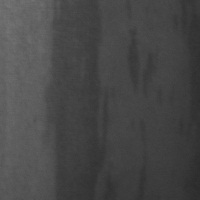


./images/sample_val_infer/crazing_80.jpg


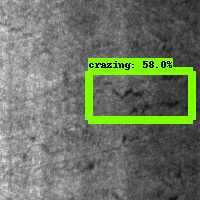


./images/sample_val_infer/inclusion_234.jpg


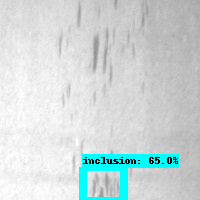


./images/sample_val_infer/patches_299.jpg


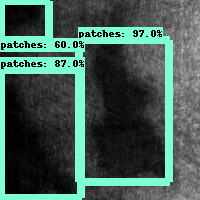


./images/sample_val_infer/patches_241.jpg


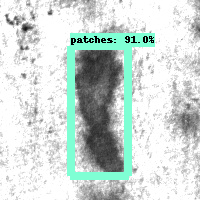


./images/sample_val_infer/pitted_surface_107.jpg


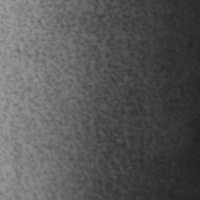


./images/sample_val_infer/pitted_surface_293.jpg


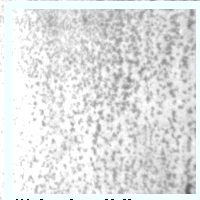


./images/sample_val_infer/rolled-in_scale_200.jpg


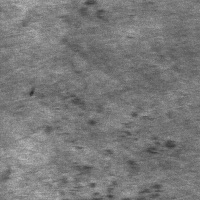


./images/sample_val_infer/rolled-in_scale_261.jpg


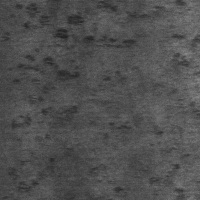


./images/sample_val_infer/scratches_228.jpg


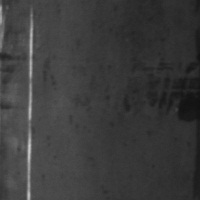


./images/sample_val_infer/scratches_256.jpg


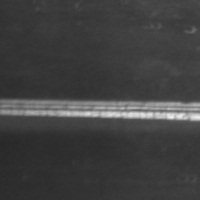

In [ ]:
import glob
for image_path in glob.glob('./images/sample_val_infer/*.jpg'):
  print("")
  print(image_path)
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

####  inference speed on GPU (K80), method 2 

In [ ]:
import glob
import time

for image_path in glob.glob('./images/sample_val_infer/*.jpg'):
  print("")
  print(image_path)
  start_time=time.time()
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  print(" Inference time: %s seconds " % (time.time() - start_time)) 
  #viz_utils.visualize_boxes_and_labels_on_image_array(
  #    image_np,
  #    output_dict['detection_boxes'],
  #    output_dict['detection_classes'],
  #    output_dict['detection_scores'],
  #    category_index,
  #    instance_masks=output_dict.get('detection_masks_reframed', None),
  #    use_normalized_coordinates=True,
  #    line_thickness=8)
  #display(Image.fromarray(image_np))


./images/sample_val_infer/inclusion_36.jpg
 Inference time: 9.594039916992188 seconds 

./images/sample_val_infer/crazing_80.jpg
 Inference time: 0.626068115234375 seconds 

./images/sample_val_infer/inclusion_234.jpg
 Inference time: 1.2659811973571777 seconds 

./images/sample_val_infer/patches_299.jpg
 Inference time: 0.7984426021575928 seconds 

./images/sample_val_infer/patches_241.jpg
 Inference time: 0.9022152423858643 seconds 

./images/sample_val_infer/pitted_surface_107.jpg
 Inference time: 0.7685840129852295 seconds 

./images/sample_val_infer/pitted_surface_293.jpg
 Inference time: 0.8733222484588623 seconds 

./images/sample_val_infer/rolled-in_scale_200.jpg
 Inference time: 0.8069329261779785 seconds 

./images/sample_val_infer/rolled-in_scale_261.jpg
 Inference time: 0.7896401882171631 seconds 

./images/sample_val_infer/scratches_228.jpg
 Inference time: 0.8141934871673584 seconds 

./images/sample_val_infer/scratches_256.jpg
 Inference time: 0.8402063846588135 seconds

##### inference speed on CPU, method 2

In [ ]:
import glob
import time

for image_path in glob.glob('./images/sample_val_infer/*.jpg'):
  print("")
  print(image_path)
  start_time=time.time()
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  print(" Inference time: %s seconds " % (time.time() - start_time))


./images/sample_val_infer/inclusion_36.jpg
 Inference time: 4.09746527671814 seconds 

./images/sample_val_infer/crazing_80.jpg
 Inference time: 1.3926365375518799 seconds 

./images/sample_val_infer/inclusion_234.jpg
 Inference time: 1.6143882274627686 seconds 

./images/sample_val_infer/patches_299.jpg
 Inference time: 1.196831226348877 seconds 

./images/sample_val_infer/patches_241.jpg
 Inference time: 1.3008065223693848 seconds 

./images/sample_val_infer/pitted_surface_107.jpg
 Inference time: 1.208726167678833 seconds 

./images/sample_val_infer/pitted_surface_293.jpg
 Inference time: 1.1577229499816895 seconds 

./images/sample_val_infer/rolled-in_scale_200.jpg
 Inference time: 1.1773426532745361 seconds 

./images/sample_val_infer/rolled-in_scale_261.jpg
 Inference time: 1.165283441543579 seconds 

./images/sample_val_infer/scratches_228.jpg
 Inference time: 1.1305804252624512 seconds 

./images/sample_val_infer/scratches_256.jpg
 Inference time: 1.3437707424163818 seconds 


#### inferencing speed with method 2 (roboflow method) - slightly faster

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo'

./images/sample_val_infer/rolled-in_scale_200.jpg


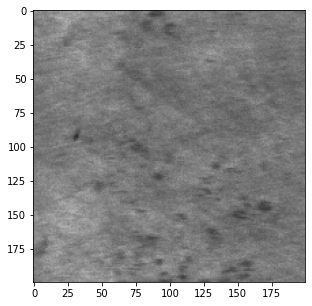

In [ ]:
### LOAD MODEL & LABELMAP
# Roboflow method: https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD#scrollTo=YnSEZIzl4M10&uniqifier=1

### load model
#recover our saved model
pipeline_config = "./exported-models/efficientdet_d1-round2/pipeline.config"  #pipeline_file

#generally you want to put the last ckpt from training in here
model_dir = './models/efficientdet_d1-round2/ckpt-23'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)


# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('./models/efficientdet_d1-round2/ckpt-23'))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)


###########################################################################
## map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)


########################################################################

# INFER

# roboflow
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random

TEST_IMAGE_PATHS = glob.glob('./images/sample_val_infer/*.jpg')
image_path = random.choice(TEST_IMAGE_PATHS)
print(image_path)
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5,
      agnostic_mode=False,
)

plt.figure(figsize=(5,5))  #12,16
plt.imshow(image_np_with_detections)
plt.show()

In [ ]:
import glob
import time

for image_path in glob.glob('./images/sample_val_infer/*.jpg'):
  print("")
  print(image_path)
  start_time=time.time()
  image_np = load_image_into_numpy_array(image_path)
  #output_dict = run_inference_for_single_image(model, image_np)
  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections, predictions_dict, shapes = detect_fn(input_tensor)
  
  label_id_offset = 1
  #image_np_with_detections = image_np.copy()
  print(" Inference time: %s seconds " % (time.time() - start_time))


./images/sample_val_infer/inclusion_36.jpg
 Inference time: 0.9918761253356934 seconds 

./images/sample_val_infer/crazing_80.jpg
 Inference time: 0.9900147914886475 seconds 

./images/sample_val_infer/inclusion_234.jpg
 Inference time: 0.9903829097747803 seconds 

./images/sample_val_infer/patches_299.jpg
 Inference time: 0.9695003032684326 seconds 

./images/sample_val_infer/patches_241.jpg
 Inference time: 0.9978542327880859 seconds 

./images/sample_val_infer/pitted_surface_107.jpg
 Inference time: 0.9955780506134033 seconds 

./images/sample_val_infer/pitted_surface_293.jpg
 Inference time: 0.9454224109649658 seconds 

./images/sample_val_infer/rolled-in_scale_200.jpg
 Inference time: 0.9526615142822266 seconds 

./images/sample_val_infer/rolled-in_scale_261.jpg
 Inference time: 0.9537684917449951 seconds 

./images/sample_val_infer/scratches_228.jpg
 Inference time: 0.9667689800262451 seconds 

./images/sample_val_infer/scratches_256.jpg
 Inference time: 0.9627976417541504 secon


./images/sample_val_infer/inclusion_36.jpg


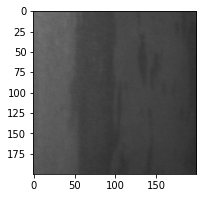


./images/sample_val_infer/crazing_80.jpg


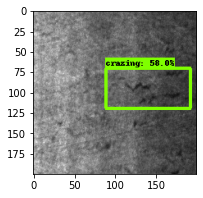


./images/sample_val_infer/inclusion_234.jpg


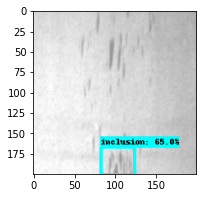


./images/sample_val_infer/patches_299.jpg


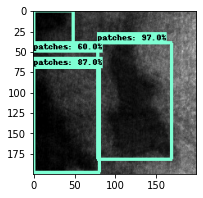


./images/sample_val_infer/patches_241.jpg


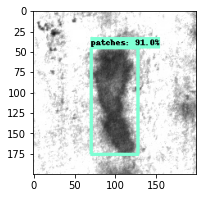


./images/sample_val_infer/pitted_surface_107.jpg


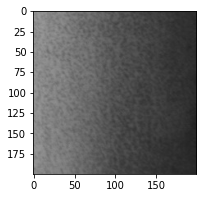


./images/sample_val_infer/pitted_surface_293.jpg


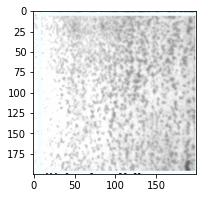


./images/sample_val_infer/rolled-in_scale_200.jpg


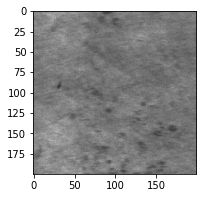


./images/sample_val_infer/rolled-in_scale_261.jpg


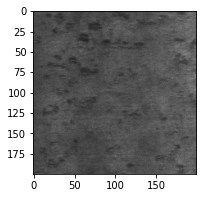


./images/sample_val_infer/scratches_228.jpg


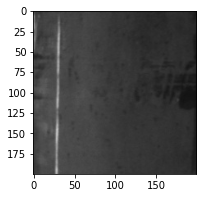


./images/sample_val_infer/scratches_256.jpg


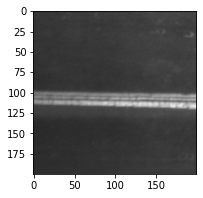

In [ ]:
for image_path in glob.glob('./images/sample_val_infer/*.jpg'):
  print("")
  print(image_path)

  #start_time=time.time()
  image_np = load_image_into_numpy_array(image_path)
  #output_dict = run_inference_for_single_image(model, image_np)
  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections, predictions_dict, shapes = detect_fn(input_tensor)
  
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  #print(" Inference time: %s seconds " % (time.time() - start_time))

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5,
      agnostic_mode=False,
      )
  
  plt.figure(figsize=(3,3))  #12,16
  plt.imshow(image_np_with_detections)
  plt.show()

##### using a different checkpoint

In [ ]:
### LOAD MODEL & LABELMAP
# Roboflow method: https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD#scrollTo=YnSEZIzl4M10&uniqifier=1

### load model
#recover our saved model
pipeline_config = "./exported-models/efficientdet_d1-round2/pipeline.config"  #pipeline_file

#generally you want to put the last ckpt from training in here
model_dir = './models/efficientdet_d1-round2/ckpt-18'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)


# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('./models/efficientdet_d1-round2/ckpt-18'))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)



./images/sample_val_infer/inclusion_36.jpg
 Inference time: 17.078181982040405 seconds 


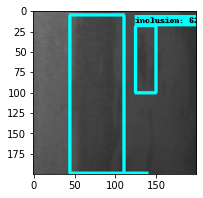


./images/sample_val_infer/crazing_80.jpg
 Inference time: 0.9659004211425781 seconds 


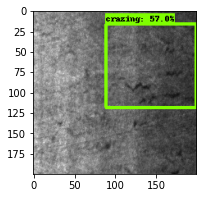


./images/sample_val_infer/inclusion_234.jpg
 Inference time: 0.9672882556915283 seconds 


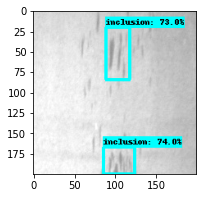


./images/sample_val_infer/patches_299.jpg
 Inference time: 1.0088210105895996 seconds 


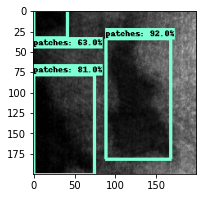


./images/sample_val_infer/patches_241.jpg
 Inference time: 1.0029828548431396 seconds 


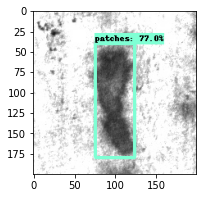


./images/sample_val_infer/pitted_surface_107.jpg
 Inference time: 0.9771707057952881 seconds 


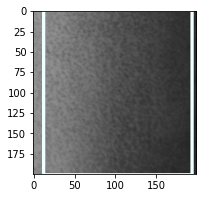


./images/sample_val_infer/pitted_surface_293.jpg
 Inference time: 0.9636774063110352 seconds 


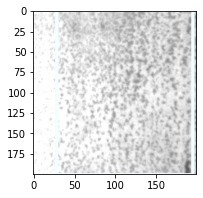


./images/sample_val_infer/rolled-in_scale_200.jpg
 Inference time: 0.9988691806793213 seconds 


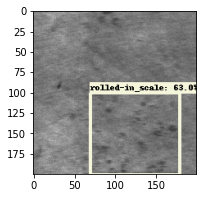


./images/sample_val_infer/rolled-in_scale_261.jpg
 Inference time: 0.9896690845489502 seconds 


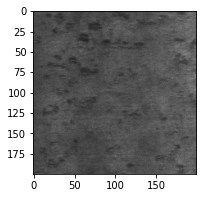


./images/sample_val_infer/scratches_228.jpg
 Inference time: 0.9871861934661865 seconds 


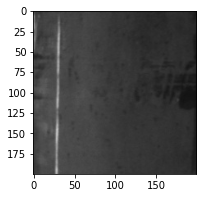


./images/sample_val_infer/scratches_256.jpg
 Inference time: 0.9876899719238281 seconds 


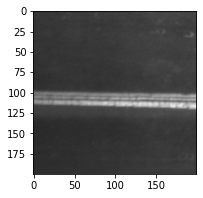

In [ ]:
###########################################################################
## map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)


########################################################################
for image_path in glob.glob('./images/sample_val_infer/*.jpg'):
  print("")
  print(image_path)

  start_time=time.time()
  image_np = load_image_into_numpy_array(image_path)
  #output_dict = run_inference_for_single_image(model, image_np)
  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections, predictions_dict, shapes = detect_fn(input_tensor)
  
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  print(" Inference time: %s seconds " % (time.time() - start_time))

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5,
      agnostic_mode=False,
      )
  
  plt.figure(figsize=(3,3))  #12,16
  plt.imshow(image_np_with_detections)
  plt.show()


#### only inference speed

In [ ]:
#https://github.com/google/automl/tree/master/efficientdet

start1 = time.time()
!python /content/detect/automl/efficientdet/model_inspect.py \
   --runmode=infer \
   --model_name={MODEL} \
   --ckpt_path={ckpt_path} \
   --input_image={img_path} \
   --output_image_dir={img_out_dir}
end1 = time.time()

In [ ]:
os.getcwd()

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo'

In [ ]:
current_path = os.getcwd()
current_path

'/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo'

In [ ]:
MODEL = 'efficientdet_d1-round2/checkpoint'
ckpt_path = current_path + '/exported-models/' + MODEL

In [ ]:
img_path = current_path + '/images/sample_val_infer/patches_299.jpg'

img_out_dir = os.path.join(os.getcwd(), 'img_out')
if not os.path.exists(img_out_dir):
  os.mkdir(img_out_dir)

In [ ]:
os.chdir("/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/infer_speed")

In [ ]:
import sys

if "efficientdet" not in os.getcwd():
  !git clone --depth 1 https://github.com/google/automl
  #!git clone --depth 4 https://github.com/google/automl
  os.chdir('automl/efficientdet')
  sys.path.append('.')
else:
  !git pull

Cloning into 'automl'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 135 (delta 12), reused 33 (delta 1), pack-reused 0
Receiving objects: 100% (135/135), 2.06 MiB | 2.18 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (121/121), done.


In [ ]:
MODEL = 'efficientdet_d1'

In [ ]:
!python /content/drive/My\ Drive/VQI/efficientDet/tensorflow/workspace/training_demo/infer_speed/automl/efficientdet/model_inspect.py \
   --runmode=infer \
   --model_name={MODEL} \
   --ckpt_path={ckpt_path} \
   --input_image={img_path} \
   --output_image_dir={img_out_dir}

2020-09-28 06:15:47.124089: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/infer_speed/automl/efficientdet/model_inspect.py", line 520, in <module>
    app.run(main)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 300, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/infer_speed/automl/efficientdet/model_inspect.py", line 500, in main
    nms_method=FLAGS.nms_method)
  File "/content/drive/My Drive/VQI/efficientDet/tensorflow/workspace/training_demo/infer_speed/automl/efficientdet/model_inspect.py", line 99, in __init__
    model_config = hparams_config.get_detection_config(model_name)
  File "/content/drive